In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats
import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style('dark')
sns.set_theme(style="darkgrid")

## Importing dataset:

In [2]:
raw = pd.read_excel('./Jumbo & Company_ Attach % .xlsx')

## Understanding the dataset

In [3]:
raw.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


## Descriptive Statistics:

In [4]:
raw.shape

(163, 7)

In [15]:
raw.describe()

,Dec,Nov,Oct,Sep,Aug,Average,Average_Rate
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.217239,0.217117,0.170920,0.167301,0.128589,0.180233,0.180233
std,0.173270,0.131246,0.116125,0.134518,0.116640,0.103524,0.103524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095000,0.130000,0.100000,0.080000,0.035000,0.117000,0.117000
50%,0.200000,0.200000,0.160000,0.150000,0.110000,0.164000,0.164000
75%,0.300000,0.295000,0.240000,0.245000,0.190000,0.235000,0.235000
max,1.000000,0.700000,0.710000,0.800000,0.600000,0.622000,0.622000


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branch      163 non-null    object 
 1   Store_Name  163 non-null    object 
 2   Dec         163 non-null    float64
 3   Nov         163 non-null    float64
 4   Oct         163 non-null    float64
 5   Sep         163 non-null    float64
 6   Aug         163 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.0+ KB


## First Thoughts:
- Dataset scope: 163 stores across 6 states, tracking insurance purchase rates over 5 months
- Overall trend: Increasing percentage of customers buying insurance with devices
- Recent slowdown: Growth stagnating in last 2 months, likely due to fewer transactions (common in recent dataset entries) and slightly higher standard deviation
- Outliers present: Maximum values significantly exceed the 3rd quartile
- Data quality concern: Some entries show 80-100% insurance purchase rates, but these may be misleading due to very low customer counts

## Branch Level Performance Benchmarking

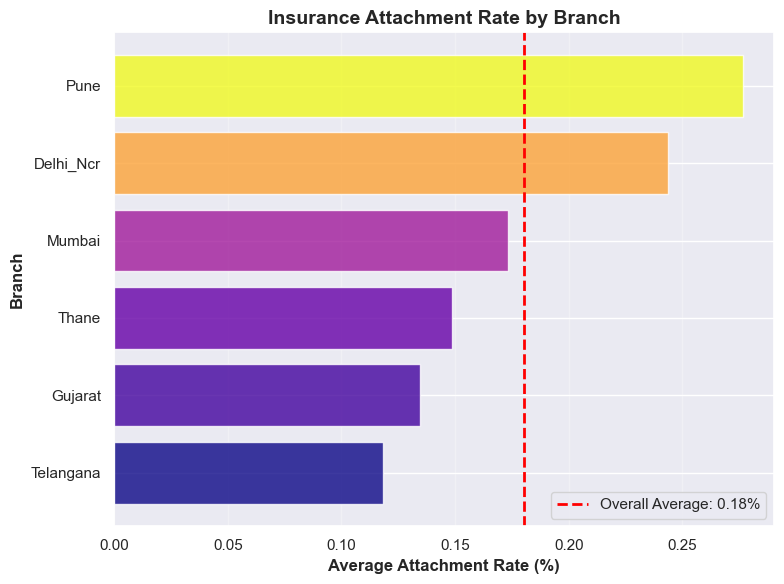


=== Summary Statistics ===
Overall Average: 0.18%

Branch Performance:
Branch
Pune         0.276500
Delhi_Ncr    0.243682
Mumbai       0.173474
Thane        0.148600
Gujarat      0.134583
Telangana    0.118350

Branches Above Average: 2
Branches Below Average: 4


In [7]:
# Convert month columns to numeric, handling any non-numeric values
month_columns = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for col in month_columns:
    raw[col] = pd.to_numeric(raw[col], errors='coerce')

# Calculate average attachment rate for each store across all months
raw['Average'] = raw[month_columns].mean(axis=1)

# Calculate average by branch
branch_avg = raw.groupby('Branch')['Average'].mean().sort_values(ascending=False)

# Calculate overall average
overall_avg = raw['Average'].mean()

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Normalize values to 0-1 range for colormap
norm = plt.Normalize(vmin=branch_avg.min(), vmax=branch_avg.max())
colors = plt.cm.plasma(norm(branch_avg.values))

# Y positions
y_pos = range(len(branch_avg))

# Plot HORIZONTAL bars  ✅
bars = ax.barh(y_pos, branch_avg.values, color=colors, alpha=0.8)

# Add reference line for overall average
ax.axvline(x=overall_avg, color='red', linestyle='--', linewidth=2,
           label=f'Overall Average: {overall_avg:.2f}%')

# Customize the plot
ax.set_ylabel('Branch', fontsize=12, fontweight='bold')
ax.set_xlabel('Average Attachment Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Insurance Attachment Rate by Branch', fontsize=14, fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(branch_avg.index)

ax.invert_yaxis()  # Invert y-axis so the highest value is at the top

ax.legend()
ax.grid(axis='x', alpha=0.3)  # ✅ grid on x-axis for barh

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
print(f"Overall Average: {overall_avg:.2f}%")
print(f"\nBranch Performance:")
print(branch_avg.to_string())
print(f"\nBranches Above Average: {(branch_avg > overall_avg).sum()}")
print(f"Branches Below Average: {(branch_avg < overall_avg).sum()}")


## Understanding Monthly Branch level performances

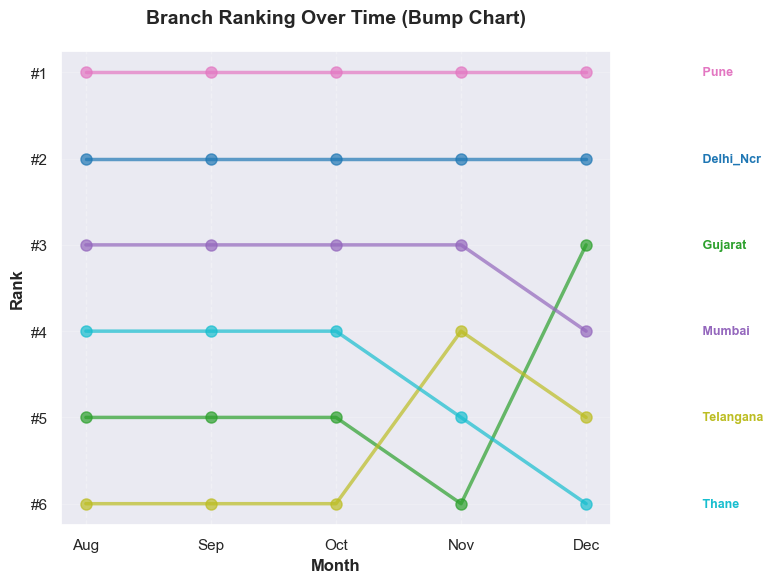


=== Branch Rankings by Month ===
           Aug  Sep  Oct  Nov  Dec
Branch                            
Delhi_Ncr    2    2    2    2    2
Gujarat      5    5    5    6    3
Mumbai       3    3    3    3    4
Pune         1    1    1    1    1
Telangana    6    6    6    4    5
Thane        4    4    4    5    6

=== Biggest Ranking Changes (Aug to Dec) ===

Biggest Improvements (moved up):
  Gujarat: moved up 2 positions
  Telangana: moved up 1 positions

Biggest Declines (moved down):
  Mumbai: moved down 1 positions
  Thane: moved down 2 positions


In [8]:
# Calculate average attachment rate for each branch for each month
branch_monthly = raw.groupby('Branch')[month_columns].mean()

# Calculate ranks for each month (1 = highest attachment rate)
ranks = pd.DataFrame()
for month in month_columns:
    ranks[month] = branch_monthly[month].rank(ascending=False, method='min')

# Create the bump chart
fig, ax = plt.subplots(figsize=(8, 6))

# Color palette for different branches
colors = plt.cm.tab10(np.linspace(0, 1, len(ranks)))


# Plot each branch's ranking over time
for idx, (branch, row) in enumerate(ranks.iterrows()):
    x = range(len(month_columns))
    y = row.values

    # Plot line
    ax.plot(x, y, marker='o', markersize=8, linewidth=2.5,
            label=branch, color=colors[idx], alpha=0.7)

    # Add branch label at the end
    ax.text(len(month_columns) - 0.1, y[-1], f' {branch}',
            va='center', fontsize=9, color=colors[idx], fontweight='bold')

# Customize the plot
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Rank', fontsize=12, fontweight='bold')
ax.set_title('Branch Ranking Over Time (Bump Chart)', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(range(len(month_columns)))
ax.set_xticklabels(month_columns, fontsize=11)

# Invert y-axis so rank 1 is at the top
ax.invert_yaxis()

# Set y-axis to show integer ranks
ax.set_yticks(range(1, len(ranks) + 1))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'#{int(x)}'))

# Add grid
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.grid(axis='y', alpha=0.2)

# Remove legend (since we have labels on the right)
# If you want a legend instead, uncomment the next line and remove the text labels above
# ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()

# Print ranking changes
print("\n=== Branch Rankings by Month ===")
print(ranks.astype(int).to_string())

# Identify biggest movers
print("\n=== Biggest Ranking Changes (Aug to Dec) ===")
rank_change = ranks['Dec'] - ranks['Aug']
rank_change_sorted = rank_change.sort_values()

print("\nBiggest Improvements (moved up):")
improvements = rank_change_sorted[rank_change_sorted < 0].head(3)
for branch, change in improvements.items():
    print(f"  {branch}: moved up {abs(int(change))} positions")

print("\nBiggest Declines (moved down):")
declines = rank_change_sorted[rank_change_sorted > 0].tail(3)
for branch, change in declines.items():
    print(f"  {branch}: moved down {int(change)} positions")

## Monthly Outliers Analysis

C:\Users\shrit\AppData\Local\Temp\ipykernel_23624\1258122230.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(branch_data, labels=branch_names, patch_artist=True,


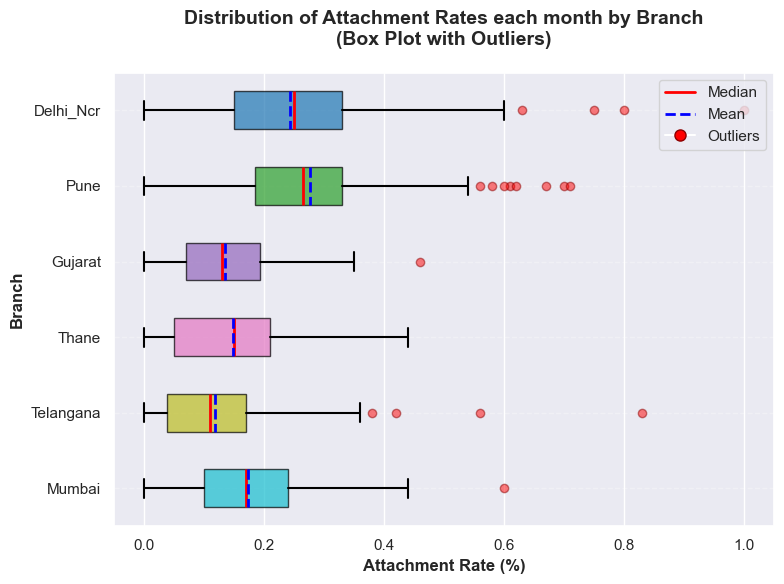


=== Outlier Analysis by Branch ===

Note: Each Store is analysed 5 times, one for each month.

Branches Ranked by Number of Outliers:
Pune            | Outliers:   8 ( 10.0%) | IQR:   0.15 | Range: [  0.00,   0.71]
Delhi_Ncr       | Outliers:   4 (  1.8%) | IQR:   0.18 | Range: [  0.00,   1.00]
Telangana       | Outliers:   4 (  2.0%) | IQR:   0.13 | Range: [  0.00,   0.83]
Gujarat         | Outliers:   1 (  0.8%) | IQR:   0.12 | Range: [  0.00,   0.46]
Mumbai          | Outliers:   1 (  1.1%) | IQR:   0.14 | Range: [  0.00,   0.60]
Thane           | Outliers:   0 (  0.0%) | IQR:   0.16 | Range: [  0.00,   0.44]

=== Summary ===
Branch with most outliers: Pune (8 outliers)
Branch with least outliers: Thane (0 outliers)

Average outliers per branch: 3.0
Total outliers across all branches: 18


In [ ]:
# Create a list to store all values for each branch
branch_data = []
branch_names = []

for branch in raw['Branch'].unique():
    branch_raw = raw[raw['Branch'] == branch]
    # Collect all monthly values for this branch across all stores
    all_values = branch_raw[month_columns].values.flatten()
    # Remove NaN values
    all_values = all_values[~np.isnan(all_values)]

    if len(all_values) > 0:
        branch_data.append(all_values)
        branch_names.append(branch)
# Creating Colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(branch_names)))

# Create the box plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create box plot
bp = ax.boxplot(branch_data, labels=branch_names, patch_artist=True,
                showmeans=True, meanline=True,
                orientation="horizontal",
                medianprops=dict(color='red', linewidth=2),
                meanprops=dict(color='blue', linewidth=2, linestyle='--'),
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=6,
                               alpha=0.5, markeredgecolor='darkred'))

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Customize the plot
ax.set_ylabel('Branch', fontsize=12, fontweight='bold')
ax.set_xlabel('Attachment Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Attachment Rates each month by Branch\n(Box Plot with Outliers)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_yticklabels(branch_names, ha='right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

ax.invert_yaxis()  # Invert y-axis so the highest
# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', linewidth=2, label='Median'),
    Line2D([0], [0], color='blue', linewidth=2, linestyle='--', label='Mean'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
           markersize=8, label='Outliers', markeredgecolor='darkred')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# Calculate and print statistics about outliers
print("\n=== Outlier Analysis by Branch ===\n")
print("Note: Each Store is analysed 5 times, one for each month.\n")
outlier_stats = []
for i, (branch, data) in enumerate(zip(branch_names, branch_data)):
    # Calculate IQR
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # Define outlier bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Count outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(data)) * 100

    outlier_stats.append({
        'Branch': branch,
        'Total_Values': len(data),
        'Outlier_Count': outlier_count,
        'Outlier_Percentage': outlier_percentage,
        'Q1': q1,
        'Median': np.median(data),
        'Q3': q3,
        'IQR': iqr,
        'Min': np.min(data),
        'Max': np.max(data)
    })

# Convert to DataFrame and sort by outlier count
outlier_raw = pd.DataFrame(outlier_stats).sort_values('Outlier_Count', ascending=False)

print("Branches Ranked by Number of Outliers:")
print("="*80)
for idx, row in outlier_raw.iterrows():
    print(f"{row['Branch']:15} | Outliers: {row['Outlier_Count']:3.0f} ({row['Outlier_Percentage']:5.1f}%) | "
          f"IQR: {row['IQR']:6.2f} | Range: [{row['Min']:6.2f}, {row['Max']:6.2f}]")

print("\n=== Summary ===")
print(f"Branch with most outliers: {outlier_raw.iloc[0]['Branch']} "
      f"({outlier_raw.iloc[0]['Outlier_Count']:.0f} outliers)")
print(f"Branch with least outliers: {outlier_raw.iloc[-1]['Branch']} "
      f"({outlier_raw.iloc[-1]['Outlier_Count']:.0f} outliers)")
print(f"\nAverage outliers per branch: {outlier_raw['Outlier_Count'].mean():.1f}")
print(f"Total outliers across all branches: {outlier_raw['Outlier_Count'].sum():.0f}")

## Branch Level Outlier Analysis with ANOVA and Tukey HSD tests

C:\Users\shrit\AppData\Local\Temp\ipykernel_23624\3486269446.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


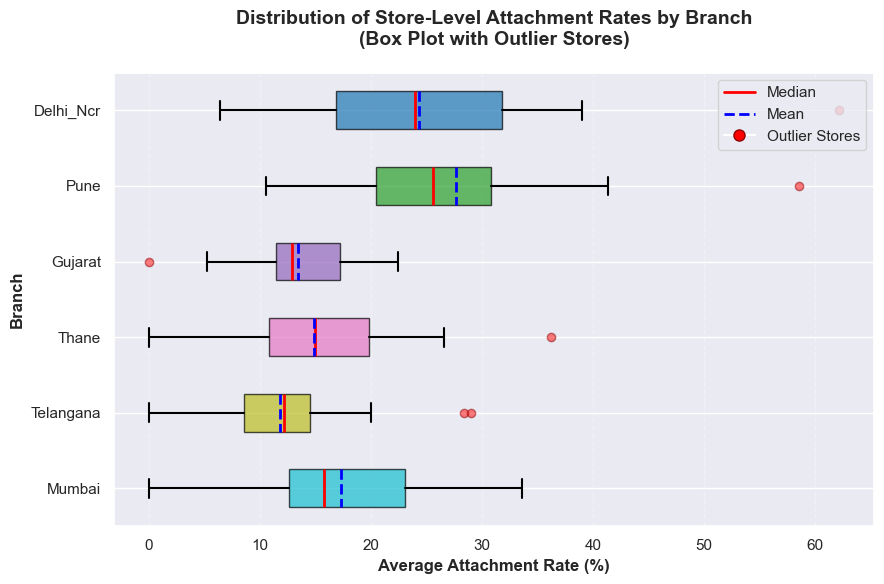


=== STORE-LEVEL Outlier Analysis by Branch ===

Note: Each store is analyzed once using its 5-month average

Branches Ranked by Number of Outlier STORES:
Branch          Total Stores  Outlier Stores  Outlier %    IQR      Range
------------------------------------------------------------------------------------------
Telangana       40            2               5.0          5.90     [0.00, 29.00]
Delhi_Ncr       44            1               2.3          14.95    [6.40, 62.20]
Pune            16            1               6.2          10.30    [10.60, 58.60]
Gujarat         24            1               4.2          5.70     [0.00, 22.40]
Thane           20            1               5.0          9.00     [0.00, 36.20]
Mumbai          19            0               0.0          10.50    [0.00, 33.60]

ANOVA ANALYSIS (Store-Level)
F-statistic: 14.5393
P-value: 0.000000

Effect Size (η²): 0.3165
Branch explains 31.65% of variance

Pairwise Significant Differences (p < 0.05):
• Delhi_Ncr

In [10]:
# Convert month columns to numeric
month_columns = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for col in month_columns:
    raw[col] = pd.to_numeric(raw[col], errors='coerce')

# Calculate average attachment rate for each store (RAW 0–1)
raw['Average_Rate'] = raw[month_columns].mean(axis=1)

# Remove rows with NaN averages
raw_clean = raw.dropna(subset=['Average_Rate'])

# ============================================================================
# STORE-LEVEL OUTLIER ANALYSIS
# ============================================================================

branch_data = []
branch_names = []
branch_store_details = {}

for branch in raw_clean['Branch'].unique():
    branch_raw = raw_clean[raw_clean['Branch'] == branch]
    store_averages = branch_raw['Average_Rate'].values

    if len(store_averages) > 0:
        branch_data.append(store_averages)
        branch_names.append(branch)
        branch_store_details[branch] = branch_raw[['Store_Name', 'Average_Rate']].copy()

# ============================================================================
# BOX PLOT (PERCENTAGE FOR DISPLAY ONLY)
# ============================================================================

fig, ax = plt.subplots(figsize=(9, 6))

branch_data_pct = [d * 100 for d in branch_data]
colors = plt.cm.tab10(np.linspace(0, 1, len(branch_names)))

bp = ax.boxplot(
    branch_data_pct,
    labels=branch_names,
    patch_artist=True,
    showmeans=True,
    meanline=True,
    vert=False,  # correct argument
    medianprops=dict(color='red', linewidth=2),
    meanprops=dict(color='blue', linewidth=2, linestyle='--'),
    boxprops=dict(alpha=0.7),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='red',
                    markersize=6, alpha=0.5,
                    markeredgecolor='darkred')
)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Branch', fontsize=12, fontweight='bold')
ax.set_xlabel('Average Attachment Rate (%)', fontsize=12, fontweight='bold')
ax.set_title(
    'Distribution of Store-Level Attachment Rates by Branch\n(Box Plot with Outlier Stores)',
    fontsize=14, fontweight='bold', pad=20
)

ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

legend_elements = [
    Line2D([0], [0], color='red', linewidth=2, label='Median'),
    Line2D([0], [0], color='blue', linewidth=2, linestyle='--', label='Mean'),
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor='red', markeredgecolor='darkred',
           markersize=8, label='Outlier Stores')
]

ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# ============================================================================
# STORE-LEVEL OUTLIER STATISTICS (RAW SCALE)
# ============================================================================

print("\n=== STORE-LEVEL Outlier Analysis by Branch ===\n")
print("Note: Each store is analyzed once using its 5-month average\n")

outlier_stats = []
outlier_stores_list = []

for branch, data in zip(branch_names, branch_data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_mask = (data < lower_bound) | (data > upper_bound)
    outlier_count = outlier_mask.sum()
    outlier_percentage = (outlier_count / len(data)) * 100

    branch_stores = branch_store_details[branch]
    outlier_stores = branch_stores[outlier_mask]

    for _, row in outlier_stores.iterrows():
        outlier_stores_list.append({
            'Branch': branch,
            'Store_Name': row['Store_Name'],
            'Average_Rate': row['Average_Rate'] * 100,
            'Outlier_Type': 'High' if row['Average_Rate'] > upper_bound else 'Low',
            'Upper_Bound': upper_bound * 100,
            'Lower_Bound': lower_bound * 100
        })

    outlier_stats.append({
        'Branch': branch,
        'Total_Stores': len(data),
        'Outlier_Stores': outlier_count,
        'Outlier_Percentage': outlier_percentage,
        'IQR': iqr * 100,
        'Min': data.min() * 100,
        'Max': data.max() * 100
    })

outlier_raw = pd.DataFrame(outlier_stats).sort_values('Outlier_Stores', ascending=False)

print("Branches Ranked by Number of Outlier STORES:")
print("="*90)
print(f"{'Branch':<15} {'Total Stores':<13} {'Outlier Stores':<15} {'Outlier %':<12} {'IQR':<8} {'Range'}")
print("-"*90)

for _, row in outlier_raw.iterrows():
    print(f"{row['Branch']:<15} {row['Total_Stores']:<13} {row['Outlier_Stores']:<15} "
          f"{row['Outlier_Percentage']:<12.1f} {row['IQR']:<8.2f} "
          f"[{row['Min']:.2f}, {row['Max']:.2f}]")

# ============================================================================
# ANOVA (RAW VALUES – CORRECT)
# ============================================================================

print("\n" + "="*90)
print("ANOVA ANALYSIS (Store-Level)")
print("="*90)

f_statistic, p_value = stats.f_oneway(*branch_data)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.6f}")

# Effect size (η²)
grand_mean = np.mean(np.concatenate(branch_data))
ss_total = np.sum((np.concatenate(branch_data) - grand_mean) ** 2)
ss_between = sum(len(d) * (np.mean(d) - grand_mean) ** 2 for d in branch_data)
eta_squared = ss_between / ss_total

print(f"\nEffect Size (η²): {eta_squared:.4f}")
print(f"Branch explains {eta_squared*100:.2f}% of variance")

# ============================================================================
# TUKEY POST-HOC
# ============================================================================

if p_value < 0.05:
    from scipy.stats import tukey_hsd

    res = tukey_hsd(*branch_data)

    print("\nPairwise Significant Differences (p < 0.05):")
    for i in range(len(branch_names)):
        for j in range(i + 1, len(branch_names)):
            if res.pvalue[i, j] < 0.05:
                diff = abs(np.mean(branch_data[i]) - np.mean(branch_data[j])) * 100
                print(f"• {branch_names[i]} vs {branch_names[j]} "
                      f"(p={res.pvalue[i, j]:.4f}, diff={diff:.2f}%)")

print("\n" + "="*90)


In [11]:
import numpy as np

def to_pct(x):
    return np.array(x) * 100

def pct_str(x, decimals=2):
    return f"{x*100:.{decimals}f}%"


## Branch level Statistics

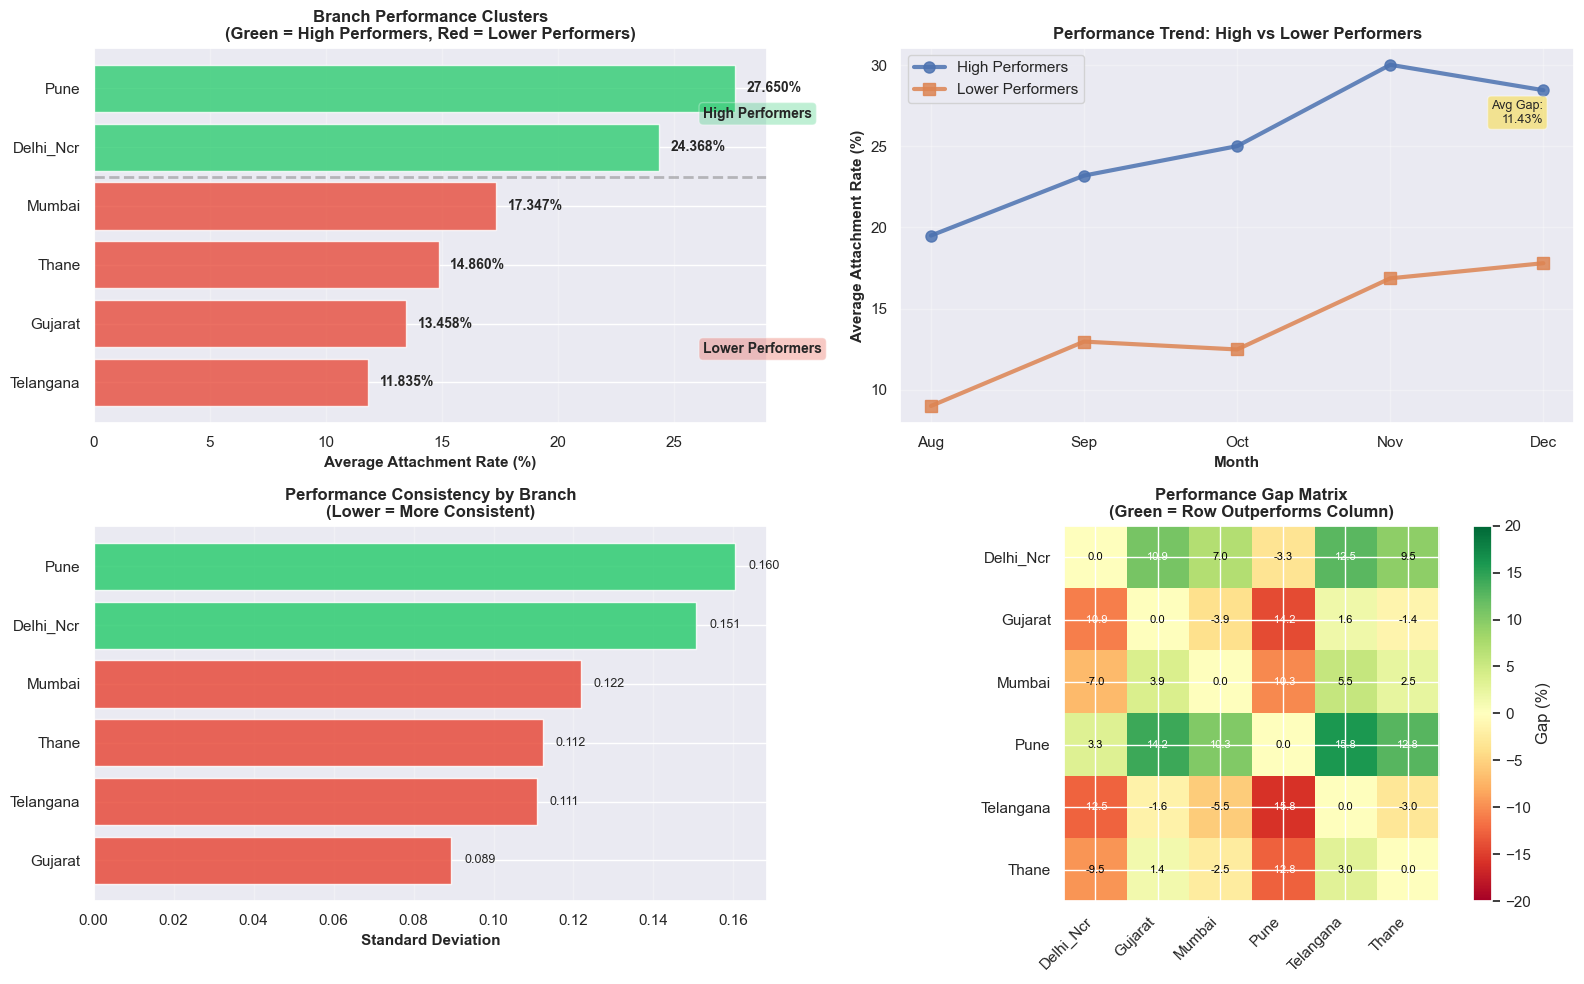


PERFORMANCE CLUSTER ANALYSIS

High Performers (2): Pune, Delhi_Ncr
Lower Performers (4): Mumbai, Thane, Gujarat, Telangana

--- HIGH PERFORMERS ---
Pune            | Mean: 27.65% | Std: 0.1605
Delhi_Ncr       | Mean: 24.37% | Std: 0.1507

--- LOWER PERFORMERS ---
Mumbai          | Mean: 17.35% | Std: 0.1218
Thane           | Mean: 14.86% | Std: 0.1123
Gujarat         | Mean: 13.46% | Std: 0.0894
Telangana       | Mean: 11.83% | Std: 0.1109

High Performers Avg:  26.01%
Lower Performers Avg: 14.38%
Performance Gap:     11.63%
Relative Difference: 80.93%


In [12]:
# Calculate average attachment rate for each branch
branch_means = raw.groupby('Branch')[month_columns].apply(
    lambda x: x.values.flatten()[~np.isnan(x.values.flatten())].mean()
).sort_values(ascending=False)

# Define performance clusters based on ANOVA results
# High performers have HIGHER attachment rates
# From the ANOVA results, Delhi_NCR and Pune significantly outperformed others
# Check the actual means to confirm
branch_list = branch_means.index.tolist()
# Top 2 performers based on actual mean values
high_performers = branch_list[:2]  # Highest attachment rates
lower_performers = branch_list[2:]  # Lower attachment rates

# Assign colors based on cluster
colors = ['#2ecc71' if branch in high_performers else '#e74c3c'
          for branch in branch_means.index]


# Create figure with subplots
fig = plt.figure(figsize=(16, 10))

# ============================================================================
# Plot 1: Bar Chart with Performance Clusters
# ============================================================================
ax1 = plt.subplot(2, 2, 1)

branch_means = branch_means.sort_values(ascending=False)

bars = ax1.barh(
    range(len(branch_means)),
    branch_means.values * 100,
    color=colors,
    alpha=0.8
)

for bar, value in zip(bars, branch_means.values):
    ax1.text(value*100 + 0.5,
             bar.get_y() + bar.get_height()/2,
             f'{value*100:.3f}%',
             va='center', fontsize=10, fontweight='bold')

ax1.set_yticks(range(len(branch_means)))
ax1.set_yticklabels(branch_means.index)
ax1.set_xlabel('Average Attachment Rate (%)', fontsize=11, fontweight='bold')
ax1.set_title('Branch Performance Clusters\n(Green = High Performers, Red = Lower Performers)',
              fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

ax1.axhline(y=1.5, color='gray', linestyle='--', linewidth=2, alpha=0.5)

x_pos = branch_means.max() * 100 * 0.95

ax1.text(x_pos, 0.5, 'High Performers',
         fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='#2ecc71', alpha=0.3))

ax1.text(x_pos, len(branch_means) - 1.5, 'Lower Performers',
         fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='#e74c3c', alpha=0.3))


# ============================================================================
# Plot 2: Monthly Trend Comparison (High vs Lower Performers)
# ============================================================================
ax2 = plt.subplot(2, 2, 2)

high_perf_monthly = raw[raw['Branch'].isin(high_performers)][month_columns].mean()
lower_perf_monthly = raw[raw['Branch'].isin(lower_performers)][month_columns].mean()

x = np.arange(len(month_columns))

ax2.plot(x, to_pct(high_perf_monthly.values), marker='o',
         linewidth=3, markersize=8,
         label='High Performers', alpha=0.85)

ax2.plot(x, to_pct(lower_perf_monthly.values), marker='s',
         linewidth=3, markersize=8,
         label='Lower Performers', alpha=0.85)

ax2.set_xticks(x)
ax2.set_xticklabels(month_columns)
ax2.set_xlabel('Month', fontsize=11, fontweight='bold')
ax2.set_ylabel('Average Attachment Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Performance Trend: High vs Lower Performers',
              fontsize=12, fontweight='bold')

ax2.grid(alpha=0.3)
ax2.legend()

gap = (high_perf_monthly.mean() - lower_perf_monthly.mean()) * 100

ax2.text(
    x[-1],
    to_pct(high_perf_monthly.iloc[-1]) - 2,
    f'Avg Gap:\n{gap:.2f}%',
    ha='right',
    fontsize=9,
    bbox=dict(boxstyle='round', facecolor='gold', alpha=0.4)
)


# ============================================================================
# Plot 3: Variance Comparison
# ============================================================================
ax3 = plt.subplot(2, 2, 3)

branch_std = (
    raw.groupby('Branch')[month_columns]
       .apply(lambda x: np.nanstd(x.values))
       .sort_values(ascending=False)
)

colors_std = [
    '#2ecc71' if b in high_performers else '#e74c3c'
    for b in branch_std.index
]

bars = ax3.barh(
    range(len(branch_std)),
    branch_std.values,
    color=colors_std,
    alpha=0.85
)

pad = branch_std.max() * 0.02

for bar, val in zip(bars, branch_std.values):
    ax3.text(val + pad,
             bar.get_y() + bar.get_height()/2,
             f'{val:.3f}',
             va='center', fontsize=9)

ax3.set_yticks(range(len(branch_std)))
ax3.set_yticklabels(branch_std.index)
ax3.set_xlabel('Standard Deviation', fontsize=11, fontweight='bold')
ax3.set_title('Performance Consistency by Branch\n(Lower = More Consistent)',
              fontsize=12, fontweight='bold')

ax3.grid(axis='x', alpha=0.3)
ax3.invert_yaxis()


# ============================================================================
# Plot 4: Performance Gap Matrix
# ============================================================================
ax4 = plt.subplot(2, 2, 4)

branch_means = (
    raw.groupby('Branch')[month_columns]
       .mean()
       .mean(axis=1)
)

branches = branch_means.index.tolist()
n = len(branches)

gap_matrix = np.zeros((n, n))

for i, b1 in enumerate(branches):
    for j, b2 in enumerate(branches):
        gap_matrix[i, j] = (branch_means[b1] - branch_means[b2]) * 100

im = ax4.imshow(gap_matrix, cmap='RdYlGn', vmin=-20, vmax=20)

ax4.set_xticks(range(n))
ax4.set_yticks(range(n))
ax4.set_xticklabels(branches, rotation=45, ha='right')
ax4.set_yticklabels(branches)

ax4.set_title('Performance Gap Matrix\n(Green = Row Outperforms Column)',
              fontsize=12, fontweight='bold')

cbar = plt.colorbar(im, ax=ax4)
cbar.set_label('Gap (%)')

for i in range(n):
    for j in range(n):
        color = 'white' if abs(gap_matrix[i, j]) > 10 else 'black'
        ax4.text(j, i, f'{gap_matrix[i, j]:.1f}',
                 ha='center', va='center',
                 fontsize=8, color=color)


plt.tight_layout()
plt.show()


# ============================================================================
# Print Summary Statistics
# ============================================================================
print("\n" + "="*80)
print("PERFORMANCE CLUSTER ANALYSIS")
print("="*80)

print(f"\nHigh Performers ({len(high_performers)}): {', '.join(high_performers)}")
print(f"Lower Performers ({len(lower_performers)}): {', '.join(lower_performers)}")

print("\n--- HIGH PERFORMERS ---")
for b in high_performers:
    print(f"{b:15} | Mean: {pct_str(branch_means[b])} | Std: {branch_std[b]:.4f}")

print("\n--- LOWER PERFORMERS ---")
for b in lower_performers:
    print(f"{b:15} | Mean: {pct_str(branch_means[b])} | Std: {branch_std[b]:.4f}")

high_mean = branch_means[high_performers].mean()
low_mean = branch_means[lower_performers].mean()

print("\n" + "="*80)
print(f"High Performers Avg:  {pct_str(high_mean)}")
print(f"Lower Performers Avg: {pct_str(low_mean)}")
print(f"Performance Gap:     {(high_mean-low_mean)*100:.2f}%")
print(f"Relative Difference: {((high_mean-low_mean)/low_mean*100):.2f}%")
print("="*80)


## Classifying Stores Based on Performance

C:\Users\shrit\AppData\Local\Temp\ipykernel_23624\2076036614.py:154: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')


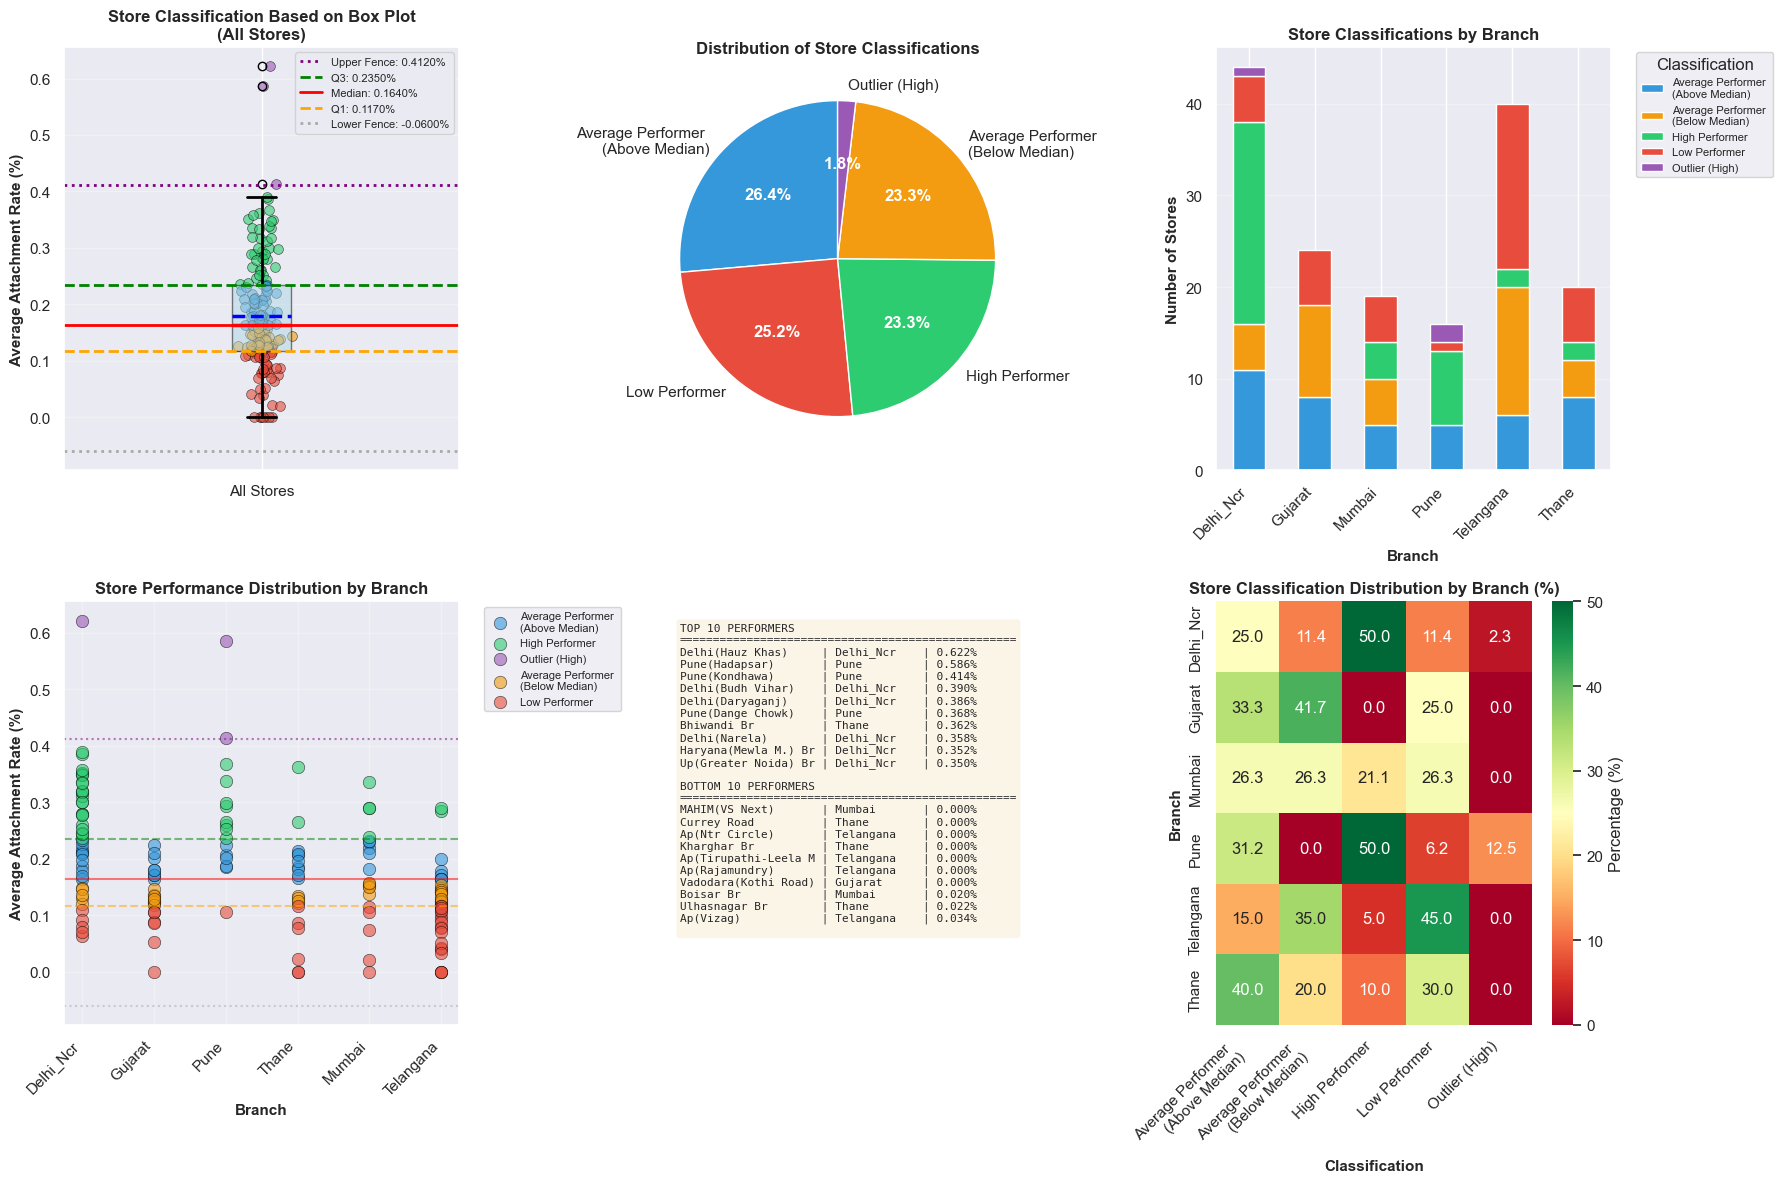


STORE PERFORMANCE CLASSIFICATION REPORT

--- CLASSIFICATION CRITERIA ---
Lower Fence (Q1 - 1.5×IQR):     -0.0600%
Q1 (25th Percentile):           0.1170%
Median (50th Percentile):       0.1640%
Q3 (75th Percentile):           0.2350%
Upper Fence (Q3 + 1.5×IQR):     0.4120%
IQR (Interquartile Range):      0.1180%

--- OVERALL CLASSIFICATION SUMMARY ---
Average Performer 
(Above Median)   | Count:  43 ( 26.4%) | Avg Rate: 0.1945%
Average Performer 
(Below Median)   | Count:  38 ( 23.3%) | Avg Rate: 0.1346%
High Performer                      | Count:  38 ( 23.3%) | Avg Rate: 0.3017%
Low Performer                       | Count:  41 ( 25.2%) | Avg Rate: 0.0686%
Outlier (High)                      | Count:   3 (  1.8%) | Avg Rate: 0.5407%

--- CLASSIFICATION BY BRANCH ---

Delhi_Ncr:
  Average Performer 
(Above Median)   |  11 stores ( 25.0%)
  Average Performer 
(Below Median)   |   5 stores ( 11.4%)
  High Performer                      |  22 stores ( 50.0%)
  Low Performer              

In [13]:
# Calculate average attachment rate for each store
raw['Average_Rate'] = raw[month_columns].mean(axis=1)

# Remove any rows with NaN averages
raw = raw.dropna(subset=['Average_Rate'])

# ============================================================================
# CLASSIFICATION LOGIC BASED ON BOX PLOT QUARTILES
# ============================================================================

def classify_store(value, q1, q3, iqr, median):
    """
    Classify store performance based on box plot position:
    - Outlier (High): Above Q3 + 1.5*IQR
    - High Performer: Between Median and Q3 (or Q3 and upper fence if no outliers)
    - Average Performer: Between Q1 and Median
    - Low Performer: Between Lower fence and Q1
    - Outlier (Low): Below Q1 - 1.5*IQR
    """
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr

    if value > upper_fence:
        return 'Outlier (High)', '#9b59b6'  # Purple
    elif value >= q3:
        return 'High Performer', '#2ecc71'  # Green
    elif value >= median:
        return 'Average Performer \n(Above Median)', '#3498db'  # Blue
    elif value >= q1:
        return 'Average Performer \n(Below Median)', '#f39c12'  # Orange
    elif value >= lower_fence:
        return 'Low Performer', '#e74c3c'  # Red
    else:
        return 'Outlier (Low)', '#34495e'  # Dark gray

# Calculate quartiles and IQR for entire dataset
q1_overall = raw['Average_Rate'].quantile(0.25)
q3_overall = raw['Average_Rate'].quantile(0.75)
median_overall = raw['Average_Rate'].median()
iqr_overall = q3_overall - q1_overall
lower_fence_overall = q1_overall - 1.5 * iqr_overall
upper_fence_overall = q3_overall + 1.5 * iqr_overall

# Classify each store
raw['Classification'], raw['Color'] = zip(*raw['Average_Rate'].apply(
    lambda x: classify_store(x, q1_overall, q3_overall, iqr_overall, median_overall)
))

# ============================================================================
# VISUALIZATIONS
# ============================================================================

fig = plt.figure(figsize=(18, 12))

# ============================================================================
# Plot 1: Enhanced Box Plot with Classifications
# ============================================================================
ax1 = plt.subplot(2, 3, 1)

# Create box plot
bp = ax1.boxplot([raw['Average_Rate']], vert=True, patch_artist=True,
                  showmeans=True, meanline=True,
                  medianprops=dict(color='red', linewidth=2.5),
                  meanprops=dict(color='blue', linewidth=2.5, linestyle='--'),
                  boxprops=dict(facecolor='lightblue', alpha=0.5),
                  whiskerprops=dict(linewidth=2),
                  capprops=dict(linewidth=2))

# Overlay individual stores with color coding
for idx, row in raw.iterrows():
    x_pos = 1 + np.random.normal(0, 0.02)  # Add slight jitter
    ax1.scatter(x_pos, row['Average_Rate'],
               color=row['Color'], alpha=0.6, s=50, edgecolor='black', linewidth=0.5)

# Add horizontal lines for classification boundaries
ax1.axhline(y=upper_fence_overall, color='purple', linestyle=':', linewidth=2,
           label=f'Upper Fence: {upper_fence_overall:.4f}%')
ax1.axhline(y=q3_overall, color='green', linestyle='--', linewidth=2,
           label=f'Q3: {q3_overall:.4f}%')
ax1.axhline(y=median_overall, color='red', linestyle='-', linewidth=2,
           label=f'Median: {median_overall:.4f}%')
ax1.axhline(y=q1_overall, color='orange', linestyle='--', linewidth=2,
           label=f'Q1: {q1_overall:.4f}%')
ax1.axhline(y=lower_fence_overall, color='darkgray', linestyle=':', linewidth=2,
           label=f'Lower Fence: {lower_fence_overall:.4f}%')

ax1.set_ylabel('Average Attachment Rate (%)', fontsize=11, fontweight='bold')
ax1.set_title('Store Classification Based on Box Plot\n(All Stores)',
             fontsize=12, fontweight='bold')
ax1.set_xticks([1])
ax1.set_xticklabels(['All Stores'])
ax1.legend(loc='best', fontsize=8)
ax1.grid(axis='y', alpha=0.3)

# ============================================================================
# Plot 2: Classification Distribution (Pie Chart)
# ============================================================================
ax2 = plt.subplot(2, 3, 2)

classification_counts = raw['Classification'].value_counts()
colors_pie = [raw[raw['Classification'] == cat]['Color'].iloc[0]
              for cat in classification_counts.index]

wedges, texts, autotexts = ax2.pie(classification_counts.values,
                                     labels=classification_counts.index,
                                     colors=colors_pie, autopct='%1.1f%%',
                                     startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax2.set_title('Distribution of Store Classifications', fontsize=12, fontweight='bold')

# ============================================================================
# Plot 3: Classification by Branch
# ============================================================================
ax3 = plt.subplot(2, 3, 3)

classification_by_branch = pd.crosstab(raw['Branch'], raw['Classification'])
classification_by_branch.plot(kind='bar', stacked=True, ax=ax3,
                              color=[raw[raw['Classification'] == cat]['Color'].iloc[0]
                                    for cat in classification_by_branch.columns])

ax3.set_xlabel('Branch', fontsize=11, fontweight='bold')
ax3.set_ylabel('Number of Stores', fontsize=11, fontweight='bold')
ax3.set_title('Store Classifications by Branch', fontsize=12, fontweight='bold')
ax3.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# ============================================================================
# Plot 4: Scatter Plot - Store Performance by Branch
# ============================================================================
ax4 = plt.subplot(2, 3, 4)

for classification in raw['Classification'].unique():
    subset = raw[raw['Classification'] == classification]
    ax4.scatter(subset['Branch'], subset['Average_Rate'],
               label=classification, color=subset['Color'].iloc[0],
               alpha=0.6, s=80, edgecolor='black', linewidth=0.5)

# Add box plot reference lines
ax4.axhline(y=upper_fence_overall, color='purple', linestyle=':', linewidth=1.5, alpha=0.5)
ax4.axhline(y=q3_overall, color='green', linestyle='--', linewidth=1.5, alpha=0.5)
ax4.axhline(y=median_overall, color='red', linestyle='-', linewidth=1.5, alpha=0.5)
ax4.axhline(y=q1_overall, color='orange', linestyle='--', linewidth=1.5, alpha=0.5)
ax4.axhline(y=lower_fence_overall, color='darkgray', linestyle=':', linewidth=1.5, alpha=0.5)

ax4.set_xlabel('Branch', fontsize=11, fontweight='bold')
ax4.set_ylabel('Average Attachment Rate (%)', fontsize=11, fontweight='bold')
ax4.set_title('Store Performance Distribution by Branch', fontsize=12, fontweight='bold')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
ax4.grid(alpha=0.3)

# ============================================================================
# Plot 5: Top and Bottom Performers Table
# ============================================================================
ax5 = plt.subplot(2, 3, 5)
ax5.axis('off')

# Get top 10 and bottom 10 stores
top_stores = raw.nlargest(10, 'Average_Rate')[['Store_Name', 'Branch', 'Average_Rate', 'Classification']]
bottom_stores = raw.nsmallest(10, 'Average_Rate')[['Store_Name', 'Branch', 'Average_Rate', 'Classification']]

table_text = "TOP 10 PERFORMERS\n" + "="*50 + "\n"
for idx, row in top_stores.iterrows():
    table_text += f"{row['Store_Name'][:20]:20} | {row['Branch']:12} | {row['Average_Rate']:.3f}%\n"

table_text += "\n" + "BOTTOM 10 PERFORMERS\n" + "="*50 + "\n"
for idx, row in bottom_stores.iterrows():
    table_text += f"{row['Store_Name'][:20]:20} | {row['Branch']:12} | {row['Average_Rate']:.3f}%\n"

ax5.text(0.1, 0.95, table_text, transform=ax5.transAxes,
        fontsize=8, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# ============================================================================
# Plot 6: Classification Summary Heatmap
# ============================================================================
ax6 = plt.subplot(2, 3, 6)

# Create percentage distribution
classification_pct = pd.crosstab(raw['Branch'], raw['Classification'], normalize='index') * 100
sns.heatmap(classification_pct, annot=True, fmt='.1f', cmap='RdYlGn',
           ax=ax6, cbar_kws={'label': 'Percentage (%)'})

ax6.set_xlabel('Classification', fontsize=11, fontweight='bold')
ax6.set_ylabel('Branch', fontsize=11, fontweight='bold')
ax6.set_title('Store Classification Distribution by Branch (%)', fontsize=12, fontweight='bold')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# ============================================================================
# DETAILED STATISTICS AND REPORTING
# ============================================================================

print("\n" + "="*80)
print("STORE PERFORMANCE CLASSIFICATION REPORT")
print("="*80)

print("\n--- CLASSIFICATION CRITERIA ---")
print(f"Lower Fence (Q1 - 1.5×IQR):     {lower_fence_overall:.4f}%")
print(f"Q1 (25th Percentile):           {q1_overall:.4f}%")
print(f"Median (50th Percentile):       {median_overall:.4f}%")
print(f"Q3 (75th Percentile):           {q3_overall:.4f}%")
print(f"Upper Fence (Q3 + 1.5×IQR):     {upper_fence_overall:.4f}%")
print(f"IQR (Interquartile Range):      {iqr_overall:.4f}%")

print("\n--- OVERALL CLASSIFICATION SUMMARY ---")
for classification in sorted(raw['Classification'].unique()):
    count = len(raw[raw['Classification'] == classification])
    percentage = (count / len(raw)) * 100
    avg_rate = raw[raw['Classification'] == classification]['Average_Rate'].mean()
    print(f"{classification:35} | Count: {count:3} ({percentage:5.1f}%) | Avg Rate: {avg_rate:.4f}%")

print("\n--- CLASSIFICATION BY BRANCH ---")
print("="*80)
for branch in sorted(raw['Branch'].unique()):
    print(f"\n{branch}:")
    branch_data = raw[raw['Branch'] == branch]
    for classification in sorted(branch_data['Classification'].unique()):
        count = len(branch_data[branch_data['Classification'] == classification])
        percentage = (count / len(branch_data)) * 100
        print(f"  {classification:35} | {count:3} stores ({percentage:5.1f}%)")

print("\n--- ACTIONABLE INSIGHTS ---")
print("="*80)

# High Outliers
high_outliers = raw[raw['Classification'] == 'Outlier (High)']
if len(high_outliers) > 0:
    print(f"\n✓ {len(high_outliers)} HIGH-PERFORMING OUTLIERS identified:")
    print("  → Study their best practices for replication")
    for idx, row in high_outliers.iterrows():
        print(f"    • {row['Store_Name']} ({row['Branch']}): {row['Average_Rate']:.3f}%")

# Low Performers and Low Outliers
low_performers = raw[raw['Classification'].isin(['Low Performer', 'Outlier (Low)'])]
if len(low_performers) > 0:
    print(f"\n✗ {len(low_performers)} STORES NEED IMMEDIATE ATTENTION:")
    print("  → Require intervention, training, or support")
    for idx, row in low_performers.head(10).iterrows():
        print(f"    • {row['Store_Name']} ({row['Branch']}): {row['Average_Rate']:.3f}%")

# Branch-specific insights
print("\n--- BRANCH-LEVEL INSIGHTS ---")
for branch in sorted(raw['Branch'].unique()):
    branch_data = raw[raw['Branch'] == branch]
    high_perf = len(branch_data[branch_data['Classification'].isin(['High Performer', 'Outlier (High)'])])
    low_perf = len(branch_data[branch_data['Classification'].isin(['Low Performer', 'Outlier (Low)'])])
    total = len(branch_data)

    print(f"\n{branch}:")
    print(f"  High Performers: {high_perf}/{total} ({high_perf/total*100:.1f}%)")
    print(f"  Low Performers:  {low_perf}/{total} ({low_perf/total*100:.1f}%)")

    if high_perf / total > 0.5:
        print(f"  → Strong branch overall")
    elif low_perf / total > 0.5:
        print(f"  → Needs significant improvement")

# Export classification results
print("\n--- EXPORTING RESULTS ---")
output_raw = raw[['Store_Name', 'Branch', 'Average_Rate', 'Classification']].sort_values('Average_Rate', ascending=False)
output_filename = 'store_classification_results.csv'
output_raw.to_csv(output_filename, index=False)
print(f"✓ Classification results exported to: {output_filename}")
print("="*80)

## Forecasts for the month of January

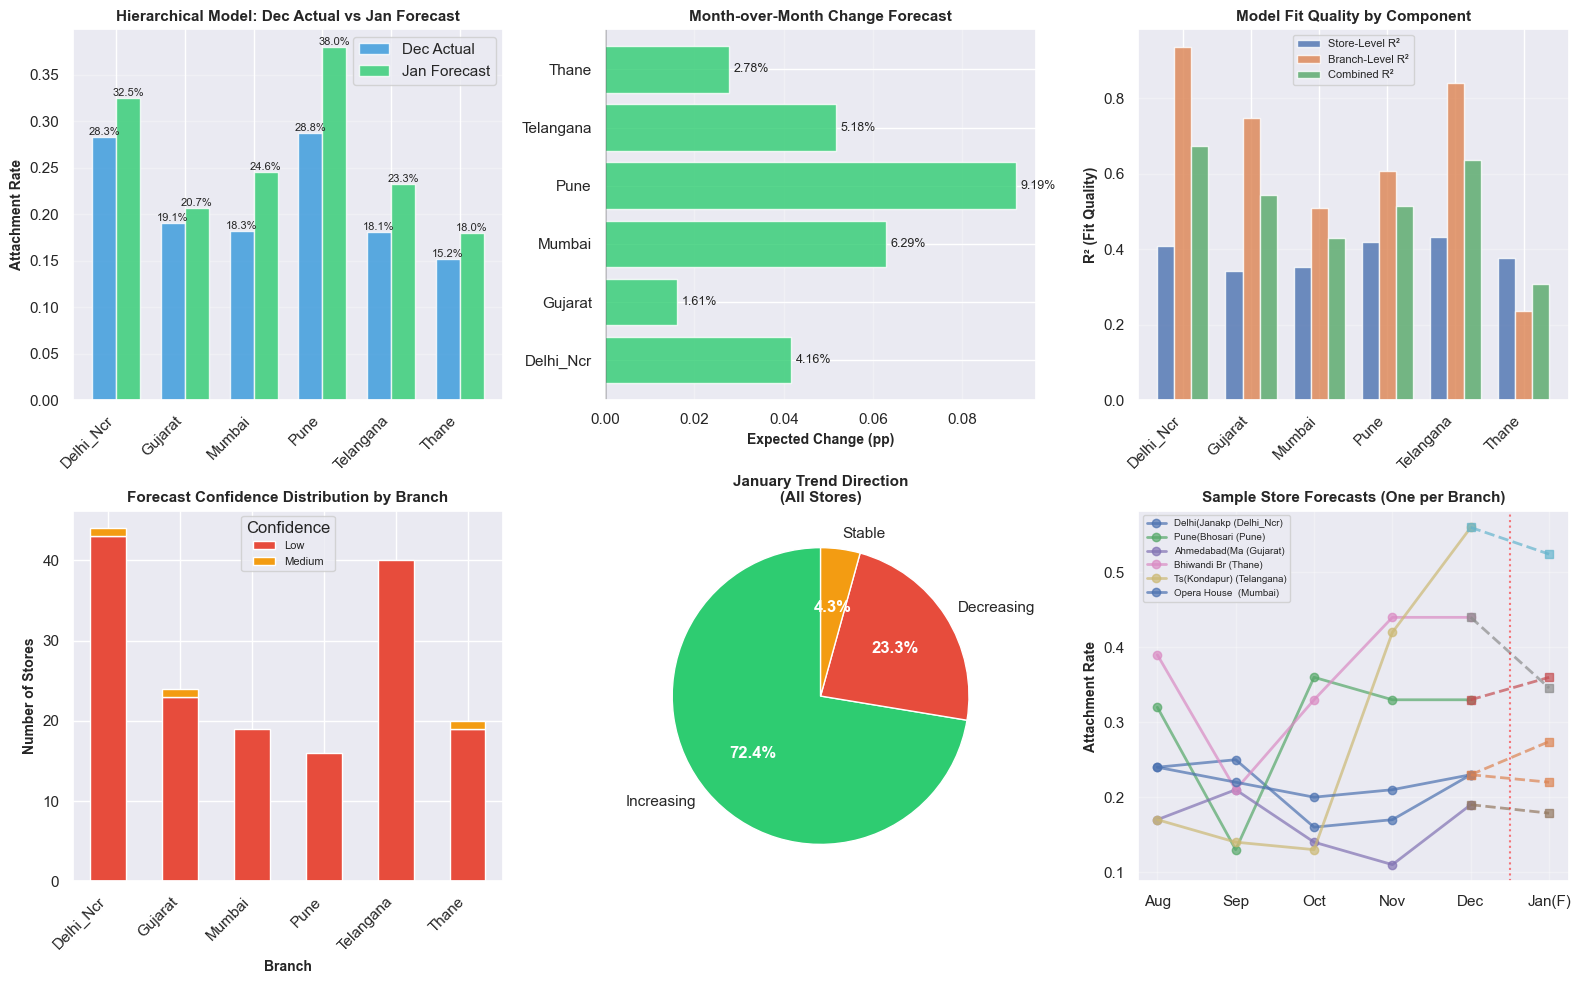


HIERARCHICAL FORECAST MODEL - JANUARY 2025

Model: Store Trend (60%) + Branch Trend (40%) with Adaptive Weighting
Branch information leveraged to improve forecast accuracy

----------------------------------------------------------------------------------------------------
Branch       Dec      Jan(F)   Change   R²(S)   R²(B)   R²(Avg)  #High 
----------------------------------------------------------------------------------------------------
Delhi_Ncr      28.3%   32.5% ↑  4.16%  0.408  0.935   0.672   0/44
Gujarat        19.1%   20.7% ↑  1.61%  0.342  0.747   0.544   0/24
Mumbai         18.3%   24.6% ↑  6.29%  0.354  0.508   0.431   0/19
Pune           28.8%   38.0% ↑  9.19%  0.419  0.607   0.513   0/16
Telangana      18.1%   23.3% ↑  5.18%  0.433  0.840   0.636   0/40
Thane          15.2%   18.0% ↑  2.78%  0.377  0.236   0.307   0/20

FORECAST CONFIDENCE SUMMARY
Low            : 160 stores ( 98.2%) | Avg Combined R²: 0.555
Medium         :   3 stores (  1.8%) | Avg Combined R²: 0.7

In [ ]:
# =============================================================================
# HIERARCHICAL FORECAST MODEL
# =============================================================================

def hierarchical_forecast_with_pi(store_values, branch_values, alpha=0.05, weight=0.6):

    warnings = []

    store_valid = ~np.isnan(store_values)
    branch_valid = ~np.isnan(branch_values)

    n_store = store_valid.sum()
    n_branch = branch_valid.sum()

    # ================= FIX 1: HARD STOP =================
    if n_store < 2 or n_branch < 2:
        return np.nan, np.nan, np.nan, np.nan, np.nan, ['insufficient']

    # ================= STORE LEVEL =================
    y_store = store_values[store_valid]
    x_store = np.arange(len(store_values))[store_valid]

    if n_store >= 3:
        slope_s, int_s, r_s, _, _ = stats.linregress(x_store, y_store)
        r2_store = r_s ** 2
        forecast_store = int_s + slope_s * len(store_values)

        y_hat_s = int_s + slope_s * x_store
        denom_s = np.sum((x_store - x_store.mean()) ** 2)

        if denom_s == 0:
            forecast_store = y_store[-1]
            pi_store = 0.15
            warnings.append('store_degenerate')
        else:
            s_err_s = np.sqrt(np.sum((y_store - y_hat_s) ** 2) / (n_store - 2))
            t_s = stats.t.ppf(1 - alpha / 2, df=n_store - 2)
            pi_store = t_s * s_err_s * np.sqrt(
                1 + 1 / n_store +
                ((len(store_values) - x_store.mean()) ** 2 / denom_s)
            )
    else:
        forecast_store = y_store[-1]
        r2_store = 0
        pi_store = 0.20
        warnings.append('low_store_sample')

    # ================= BRANCH LEVEL =================
    y_branch = branch_values[branch_valid]
    x_branch = np.arange(len(branch_values))[branch_valid]

    if n_branch >= 3:
        slope_b, int_b, r_b, _, _ = stats.linregress(x_branch, y_branch)
        r2_branch = r_b ** 2
        forecast_branch = int_b + slope_b * len(branch_values)

        y_hat_b = int_b + slope_b * x_branch
        denom_b = np.sum((x_branch - x_branch.mean()) ** 2)

        if denom_b == 0:
            forecast_branch = y_branch[-1]
            pi_branch = 0.10
            warnings.append('branch_degenerate')
        else:
            s_err_b = np.sqrt(np.sum((y_branch - y_hat_b) ** 2) / (n_branch - 2))
            t_b = stats.t.ppf(1 - alpha / 2, df=n_branch - 2)
            pi_branch = t_b * s_err_b * np.sqrt(
                1 + 1 / n_branch +
                ((len(branch_values) - x_branch.mean()) ** 2 / denom_b)
            )
    else:
        forecast_branch = y_branch[-1]
        r2_branch = 0
        pi_branch = 0.15
        warnings.append('low_branch_sample')

    # ================= ADAPTIVE WEIGHT =================
    if n_store >= 4 and r2_store > 0.5:
        adaptive_weight = min(0.8, weight + 0.2)
    elif n_store <= 3 or r2_store < 0.2:
        adaptive_weight = max(0.3, weight - 0.3)
    else:
        adaptive_weight = weight

    # ================= COMBINE =================
    forecast_combined = (
        adaptive_weight * forecast_store +
        (1 - adaptive_weight) * forecast_branch
    )

    pi_combined = (
        adaptive_weight * pi_store +
        (1 - adaptive_weight) * pi_branch
    )

    forecast = np.clip(forecast_combined, 0, 1)
    lower = max(0, forecast - pi_combined)
    upper = min(1, forecast + pi_combined)

    if forecast != forecast_combined:
        warnings.append('clipped')
    if r2_store < 0.1:
        warnings.append('poor_store_fit')
    if r2_branch < 0.1:
        warnings.append('poor_branch_fit')

    return forecast, lower, upper, r2_store, r2_branch, warnings



# =============================================================================
# CALCULATE BRANCH AVERAGES (FOR BRANCH-LEVEL TRENDS)
# =============================================================================

branch_monthly_avg = raw.groupby('Branch')[month_columns].mean()


# =============================================================================
# GENERATE FORECASTS FOR EACH STORE
# =============================================================================

results = []

for _, row in raw.iterrows():
    store_values = row[month_columns].values.astype(float)
    branch = row['Branch']
    branch_values = branch_monthly_avg.loc[branch].values.astype(float)

    f, lo, hi, r2_s, r2_b, w = hierarchical_forecast_with_pi(
        store_values,
        branch_values,
        weight=0.6  # 60% store, 40% branch by default
    )

    # Confidence classification
    if 'insufficient' in w:
        conf = 'Insufficient'
        reason = 'Too few data points'
    elif 'store_degenerate' in w and 'branch_degenerate' in w:
        conf = 'Invalid'
        reason = 'No variance in data'
    else:
        width = hi - lo

        # Consider both store and branch fit quality
        avg_r2 = (r2_s + r2_b) / 2

        if width < 0.08 and avg_r2 > 0.4:
            conf = 'High'
            reason = f'Tight PI + good fit (R²: {avg_r2:.2f})'
        elif width < 0.15 and avg_r2 > 0.2:
            conf = 'Medium'
            reason = f'Moderate uncertainty (R²: {avg_r2:.2f})'
        else:
            conf = 'Low'
            reason = f'Wide PI or poor fit (R²: {avg_r2:.2f})'

    # Calculate trend direction
    if not np.isnan(f) and not np.isnan(store_values[-1]):
        if f > store_values[-1] * 1.02:
            trend = 'Increasing'
        elif f < store_values[-1] * 0.98:
            trend = 'Decreasing'
        else:
            trend = 'Stable'
    else:
        trend = 'Unknown'

    results.append({
        'Store_Name': row['Store_Name'],
        'Branch': branch,
        'Dec_Actual': store_values[-1],
        'Jan_Forecast': f,
        'Lower_PI': lo,
        'Upper_PI': hi,
        'PI_Width': hi - lo if not np.isnan(f) else np.nan,
        'R2_Store': r2_s,
        'R2_Branch': r2_b,
        'R2_Combined': (r2_s + r2_b) / 2 if not np.isnan(r2_s) and not np.isnan(r2_b) else np.nan,
        'Confidence': conf,
        'Confidence_Reason': reason,
        'Trend': trend,
        'Warnings': '|'.join(w) if w else 'ok'
    })

forecast_df = pd.DataFrame(results)


# =============================================================================
# BRANCH-LEVEL AGGREGATION
# =============================================================================

branch_summary = (
    forecast_df
    .dropna(subset=['Jan_Forecast'])
    .groupby('Branch')
    .agg(
        Dec_Actual=('Dec_Actual', 'mean'),
        Jan_Forecast=('Jan_Forecast', 'mean'),
        Avg_R2_Store=('R2_Store', 'mean'),
        Avg_R2_Branch=('R2_Branch', 'mean'),
        Avg_R2_Combined=('R2_Combined', 'mean'),
        Store_Count=('Store_Name', 'count'),
        High_Conf_Count=('Confidence', lambda x: (x == 'High').sum()),
        Med_Conf_Count=('Confidence', lambda x: (x == 'Medium').sum()),
        Low_Conf_Count=('Confidence', lambda x: (x == 'Low').sum())
    )
)

branch_summary['Expected_Change'] = (
    branch_summary['Jan_Forecast'] - branch_summary['Dec_Actual']
)

branch_summary['High_Conf_Pct'] = (
    branch_summary['High_Conf_Count'] / branch_summary['Store_Count'] * 100
)

branch_summary = branch_summary.round(4)


# =============================================================================
# VISUALIZATIONS
# =============================================================================

fig = plt.figure(figsize=(16, 10))

# Plot 1: Branch Forecast Comparison
ax1 = plt.subplot(2, 3, 1)
x = np.arange(len(branch_summary))
w = 0.35

bars1 = ax1.bar(x - w/2, branch_summary['Dec_Actual'], w,
                label='Dec Actual', color='#3498db', alpha=0.8)
bars2 = ax1.bar(x + w/2, branch_summary['Jan_Forecast'], w,
                label='Jan Forecast', color='#2ecc71', alpha=0.8)

for bars in [bars1, bars2]:
    for bar in bars:
        h = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, h,
                f'{h*100:.1f}%', ha='center', va='bottom', fontsize=8)

ax1.set_xticks(x)
ax1.set_xticklabels(branch_summary.index, rotation=45, ha='right')
ax1.set_ylabel('Attachment Rate', fontsize=10, fontweight='bold')
ax1.set_title('Hierarchical Model: Dec Actual vs Jan Forecast', fontsize=11, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Expected Change
ax2 = plt.subplot(2, 3, 2)
colors = ['#2ecc71' if v > 0 else '#e74c3c' for v in branch_summary['Expected_Change']]
bars = ax2.barh(branch_summary.index, branch_summary['Expected_Change'], color=colors, alpha=0.8)

for bar, val in zip(bars, branch_summary['Expected_Change']):
    ax2.text(val + 0.001 if val > 0 else val - 0.001,
            bar.get_y() + bar.get_height()/2,
            f'{val*100:.2f}%', va='center',
            ha='left' if val > 0 else 'right', fontsize=9)

ax2.axvline(0, color='black', linewidth=1)
ax2.set_xlabel('Expected Change (pp)', fontsize=10, fontweight='bold')
ax2.set_title('Month-over-Month Change Forecast', fontsize=11, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Model Quality Comparison (R² by component)
ax3 = plt.subplot(2, 3, 3)
x = np.arange(len(branch_summary))
w = 0.25

ax3.bar(x - w, branch_summary['Avg_R2_Store'], w, label='Store-Level R²', alpha=0.8)
ax3.bar(x, branch_summary['Avg_R2_Branch'], w, label='Branch-Level R²', alpha=0.8)
ax3.bar(x + w, branch_summary['Avg_R2_Combined'], w, label='Combined R²', alpha=0.8)

ax3.set_xticks(x)
ax3.set_xticklabels(branch_summary.index, rotation=45, ha='right')
ax3.set_ylabel('R² (Fit Quality)', fontsize=10, fontweight='bold')
ax3.set_title('Model Fit Quality by Component', fontsize=11, fontweight='bold')
ax3.legend(fontsize=8)
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Confidence Distribution by Branch
ax4 = plt.subplot(2, 3, 4)
conf_matrix = forecast_df.groupby(['Branch', 'Confidence']).size().unstack(fill_value=0)
conf_matrix.plot(kind='bar', stacked=True, ax=ax4,
                color={'High': '#2ecc71', 'Medium': '#f39c12',
                       'Low': '#e74c3c', 'Insufficient': '#95a5a6'})

ax4.set_xlabel('Branch', fontsize=10, fontweight='bold')
ax4.set_ylabel('Number of Stores', fontsize=10, fontweight='bold')
ax4.set_title('Forecast Confidence Distribution by Branch', fontsize=11, fontweight='bold')
ax4.legend(title='Confidence', fontsize=8)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

# Plot 5: Trend Distribution
ax5 = plt.subplot(2, 3, 5)
trend_counts = forecast_df['Trend'].value_counts()
colors_trend = {'Increasing': '#2ecc71', 'Stable': '#f39c12',
                'Decreasing': '#e74c3c', 'Unknown': '#95a5a6'}
pie_colors = [colors_trend.get(t, '#95a5a6') for t in trend_counts.index]

wedges, texts, autotexts = ax5.pie(trend_counts.values, labels=trend_counts.index,
                                    colors=pie_colors, autopct='%1.1f%%', startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax5.set_title('January Trend Direction\n(All Stores)', fontsize=11, fontweight='bold')

# Plot 6: Sample Store Trajectories
ax6 = plt.subplot(2, 3, 6)
sample_stores = forecast_df.groupby('Branch').head(1)

for _, store in sample_stores.iterrows():
    hist = raw[
        (raw['Store_Name'] == store['Store_Name']) &
        (raw['Branch'] == store['Branch'])
    ][month_columns].iloc[0].values

    ax6.plot(range(5), hist, marker='o', linewidth=2, alpha=0.7,
            label=f"{store['Store_Name'][:12]} ({store['Branch']})")
    ax6.plot([4, 5], [hist[-1], store['Jan_Forecast']],
            marker='s', linewidth=2, linestyle='--', alpha=0.7)

ax6.axvline(4.5, color='red', linestyle=':', linewidth=1.5, alpha=0.5)
ax6.set_xticks(range(6))
ax6.set_xticklabels(month_columns + ['Jan(F)'])
ax6.set_ylabel('Attachment Rate', fontsize=10, fontweight='bold')
ax6.set_title('Sample Store Forecasts (One per Branch)', fontsize=11, fontweight='bold')
ax6.legend(fontsize=7, loc='best')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# =============================================================================
# REPORTING
# =============================================================================

print("\n" + "="*100)
print("HIERARCHICAL FORECAST MODEL - JANUARY 2025")
print("="*100)
print("\nModel: Store Trend (60%) + Branch Trend (40%) with Adaptive Weighting")
print("Branch information leveraged to improve forecast accuracy\n")

print("-" * 100)
print(f"{'Branch':<12} {'Dec':<8} {'Jan(F)':<8} {'Change':<8} {'R²(S)':<7} {'R²(B)':<7} {'R²(Avg)':<8} {'#High':<6}")
print("-" * 100)

for branch, row in branch_summary.iterrows():
    arrow = '↑' if row['Expected_Change'] > 0 else '↓' if row['Expected_Change'] < 0 else '→'
    print(f"{branch:<12} {row['Dec_Actual']*100:>6.1f}% {row['Jan_Forecast']*100:>6.1f}% "
          f"{arrow}{abs(row['Expected_Change'])*100:>6.2f}% "
          f"{row['Avg_R2_Store']:>6.3f} {row['Avg_R2_Branch']:>6.3f} {row['Avg_R2_Combined']:>7.3f} "
          f"{row['High_Conf_Count']:>3.0f}/{row['Store_Count']:.0f}")

print("\n" + "="*100)
print("FORECAST CONFIDENCE SUMMARY")
print("="*100)

conf_summary = forecast_df['Confidence'].value_counts().sort_index()
for conf, count in conf_summary.items():
    pct = count / len(forecast_df) * 100
    subset = forecast_df[forecast_df['Confidence'] == conf]
    avg_r2 = subset['R2_Combined'].mean()
    print(f"{conf:<15}: {count:3} stores ({pct:5.1f}%) | Avg Combined R²: {avg_r2:.3f}")

print("\n" + "="*100)
print("TREND DIRECTION SUMMARY")
print("="*100)

trend_summary = forecast_df['Trend'].value_counts()
for trend, count in trend_summary.items():
    pct = count / len(forecast_df) * 100
    subset = forecast_df[forecast_df['Trend'] == trend]
    avg_forecast = subset['Jan_Forecast'].mean() * 100
    print(f"{trend:<12}: {count:3} stores ({pct:5.1f}%) | Avg Jan Forecast: {avg_forecast:.2f}%")

# High-risk and high-opportunity stores
print("\n" + "="*100)
print("ACTION PRIORITIES")
print("="*100)

high_risk = forecast_df[
    (forecast_df['Trend'] == 'Decreasing') &
    (forecast_df['Dec_Actual'] < forecast_df['Dec_Actual'].median())
].sort_values('Jan_Forecast')

print(f"\n⚠️  HIGH-RISK STORES ({len(high_risk)} total):")
print("    (Declining trend + Below-median performance)")
for _, store in high_risk.head(10).iterrows():
    print(f"    • {store['Store_Name'][:25]:<25} ({store['Branch']:<12}): "
          f"Dec {store['Dec_Actual']*100:>5.1f}% → Jan {store['Jan_Forecast']*100:>5.1f}%")

high_opportunity = forecast_df[
    (forecast_df['Trend'] == 'Increasing') &
    (forecast_df['Confidence'] == 'High')
].sort_values('Jan_Forecast', ascending=False)

print(f"\n✓  MOMENTUM BUILDERS ({len(high_opportunity)} total):")
print("    (Increasing trend + High confidence forecast)")
for _, store in high_opportunity.head(10).iterrows():
    print(f"    • {store['Store_Name'][:25]:<25} ({store['Branch']:<12}): "
          f"Dec {store['Dec_Actual']*100:>5.1f}% → Jan {store['Jan_Forecast']*100:>5.1f}%")


# =============================================================================
# EXPORT
# =============================================================================

export_cols = ['Store_Name', 'Branch', 'Dec_Actual', 'Jan_Forecast',
               'Lower_PI', 'Upper_PI', 'PI_Width', 'R2_Store', 'R2_Branch',
               'R2_Combined', 'Confidence', 'Trend', 'Warnings']

forecast_df[export_cols].to_csv("hierarchical_forecast_jan2025.csv", index=False)
print("\n✓ Detailed forecast exported to: hierarchical_forecast_jan2025.csv")
print("="*100)